# The maximum height reached by an arrow 

After an arrow is shot vertically up, it experiences actions of two forces that slow down its motion: the gravitational force $\mathbf{F}_\mathrm{g} = m\mathbf{g}$ and the air-drag force $\mathbf{F}_\mathrm{d} = -\frac{1}{2}C_\mathrm{d}\rho_\mathrm{a}\mathbf{v}|v|A$, where $C_\mathrm{d} = 1$ is the dimensionless air-drag coefficient, $\rho_\mathrm{a}$ is the air density, and $A = \pi r^2$ is arrow's cross-section area.

__a__). Find the maximum height that can be reached by the arrow with the mass $m = 0.05$ kg, radius $r = 0.004$ m and initial velocity $v_0 = 85\ \mathrm{m\,s}^{-1}$, assuming that the air density at Earth's surface is $\rho_\mathrm{a} = 1\ \mathrm{kg\,m}^{-3}$.

__b__). How does the answer change if the arrow is shot from the surface of Mars, where the density of the atmosphere $\rho_\mathrm{a}$ is 50 times lower than on Earth? 

__c__). How does the answer change if the arrow is shot from the surface of Moon? For Moon, check if taking into account the dependence of $g$ on the height affects the maximum height reached by the arrow.

__d__). Find the final velocity of the arrow when it returns back to the surface of Moon and Earth. Why the final velocity is equal to the initial one on Moon, but is lower on Earth?

In Earth's units, the masses of Mars and Moon are 0.107 and 0.0123, while the radii are 0.532 and 0.273, respectively. Earth's radius is $6370$ km, and the gravitational acceleration on Earth is $g = 9.8\ \mathrm{m\,s}^{-2}$.

### The equation of motion (Newton's second law)

$\frac{d\mathbf{p}}{dt} = m\frac{d\mathbf{v}}{dt} = \mathbf{F} = \mathbf{F}_\mathrm{g} + \mathbf{F}_\mathrm{d} = m\mathbf{g} - \frac{1}{2}C_\mathrm{d}\rho_\mathrm{a}\mathbf{v}|v|A$

Let's choose the coordinate y axis aligned with arrow's trajectory, i.e. directed vertically up. In this case, the only non-zero projection of the equation of motion on the coordinate axes is that on the y axis, which is

$m\ddot{y} = -mg - \frac{1}{2}C_\mathrm{d}\rho_\mathrm{a}A\dot{y}\,|\dot{y}|$,

or

$\ddot{y} = a + b\dot{y}\,|\dot{y}|$, 

where $a = -g$ and $b = -\frac{C_\mathrm{d}\rho_\mathrm{a}A}{2m}$.

The last second-order ODE can be written as a system of two first-order ODEs as

$$
y_1 = y\\
\dot{y_1} = y_2\\
\dot{y_2} = a + b y_2|y_2|
$$ 

with the following initial conditions: $y_1(0) = 0$ and $y_2(0) = v_0$.

# If you need help 
Examples and Python notebooks at https://github.com/UVic-CompPhys/physmath248-2018
will help you to find solutions of this and other problems and to present your solutions in a form of a python notebook. 
In particuar, some help for the solution of the present problem
can be found in the following notebooks: 

`Part.I 3. Introduction to Python programming.ipynb`

`Part.III 1. ODEs.ipynb`

In [1]:
# populate the interactive namespace with functions from the modules numpy and matplotlib
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
# the function defining the right-hand sides (RHS) of the ODEs
def dy_dt(y, t, a, b):
    y1, y2 = y
    dydt = [y2, a + b*y2*abs(y2)]
    return dydt

In [3]:
# the parameters common for Earth, Mars nad Moon
Cd = 1.
r = 0.004
m = 0.05
A = pi*r**2

# the initial conditions
y0 = [0.0, 85.]

In [4]:
# populate the interactive namespace with the function that solves ODEs
from scipy.integrate import odeint

## Solution for Earth

In [5]:
g = 9.8 
rhoa = 1. 
a = -g
b = -(Cd*rhoa*A)/(2.*m)

# the integration time interval
t_start = 0.
t_end = 17. # adjust t_end, using the plot below, such that arrow's final height is beneath the surface (less than 0.) 
nt = 10000

t = linspace(t_start, t_end, nt)

In [6]:
# solve the ODEs
# the coefficients a and b are defined above
sol = odeint(dy_dt, y0, t, args=(a, b))

<IPython.core.display.Javascript object>


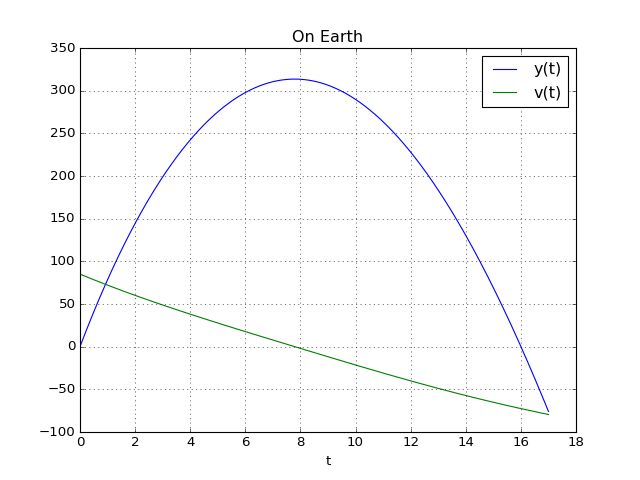


 The maximum height reached by the arrow on Earth is 313.568838478 meters


In [7]:
# plot the solution
figure(1)

plot(t, sol[:, 0], 'b', label='y(t)')
plot(t, sol[:, 1], 'g', label='v(t)')
legend(loc='best')
xlabel('t')
grid()
title("On Earth")
show()

print ("\n The maximum height reached by the arrow on Earth is",max(sol[:,0]),"meters")

In [8]:
# populate the intercative namespace with the function that makes 1d interpolation
from scipy.interpolate import interp1d

In [9]:
# interpolate the solution of the ODEs to find its derivative's value (the velocity sol[:,1]) 
# at the surface, where the height sol[:,0]=0. 

# interpolate from the second integration step to skip the starting point, where sol[:,0] is also equal to 0.
f = interp1d(sol[1:-1,0],sol[1:-1,1])
print (" The final velocity of the arrow on Earth is",f(0.),"m/s")

 The final velocity of the arrow on Earth is -72.60504070727957 m/s


## Solution for Mars

The gravitational acceleration is

$g = \frac{GM}{R^2} = \frac{GM_\oplus}{R_\oplus^2}\frac{(M/M_\oplus)}{(R/R_\oplus)^2} = g_\oplus\frac{(M/M_\oplus)}{(R/R_\oplus)^2}$,

where $M_\oplus$ and $R_\oplus$ are Earth's mass and radius.

In [10]:
g = 9.8*(0.107/0.532**2) # from the above equation
rhoa = 1./50. 
a = -g 
b = -(Cd*rhoa*A)/(2.*m)

# the integration time interval
t_start = 0.
t_end = 47. # adjust such t_end that arrow's final height is below the surface (less than 0.) 
nt = 10000

t = linspace(t_start, t_end, nt)

In [11]:
# solve the ODEs
# the coefficients a and b are defined above
sol = odeint(dy_dt, y0, t, args=(a, b))

<IPython.core.display.Javascript object>


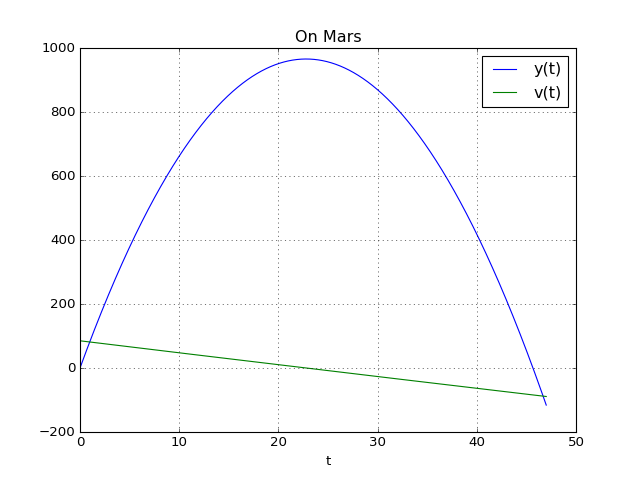


 The maximum height reached by the arrow on Mars is 965.603018299 meters


In [12]:
# plot the solution
figure(2)

plot(t, sol[:, 0], 'b', label='y(t)')
plot(t, sol[:, 1], 'g', label='v(t)')
legend(loc='best')
xlabel('t')
grid()
title("On Mars")
show()

print ("\n The maximum height reached by the arrow on Mars is",np.max(sol[:,0]),"meters")

In [13]:
# interpolate the solution of the ODEs to find its derivative's value (the velocity sol[:,1]) 
# at the surface, where the height sol[:,0]=0. 

# interpolate from the second integration step to skip the starting point, where sol[:,0] is also equal to 0.
f = interp1d(sol[2:-1,0],sol[2:-1,1])
print (" The final velocity of the arrow on Earth is",f(0.),"m/s")

 The final velocity of the arrow on Earth is -84.1788702646674 m/s


## Solution for Moon

The dependence of the gravitational acceleration on the height is

$g(h) = \frac{g(0)}{[1+(\frac{h}{R_\oplus})^2]}$

In [14]:
REarth = 6370000.

g = 9.8*(0.0123/0.273**2) 
rhoa = 0. # Moon doesn't have an atmosphere
a = -g 
b = -(Cd*rhoa*A)/(2.*m)

# the integration time interval
t_start = 0.
t_end = 110. # adjust such t_end that arrow's final height is below the surface (less than 0.) 
nt = 10000

t = linspace(t_start, t_end, nt)

In [15]:
# the right-hand sides (RHS) of the system of ODEs
def dy_dt(y, t, a, b):
    y1, y2 = y
    #dydt = [y2, a/(1.+(y1/REarth)**2) + b*y2*abd(y2)]  # this equation takes into account the dependence of g on h
    dydt = [y2, a + b*y2*abs(y2)]
    return dydt

In [16]:
# solve the ODEs
# the coefficients a and b are defined above
sol = odeint(dy_dt, y0, t, args=(a, b))

<IPython.core.display.Javascript object>


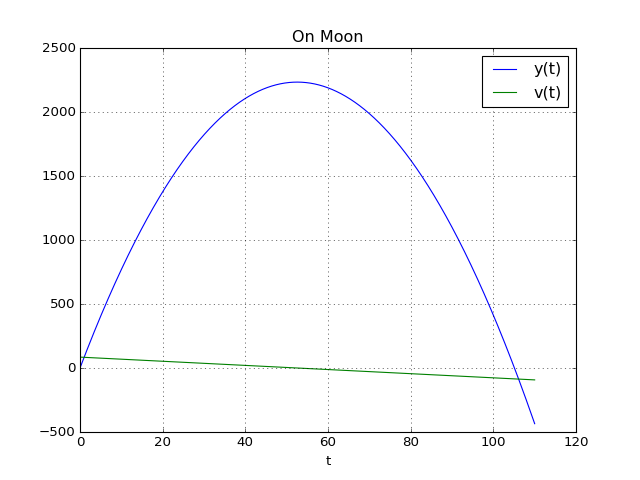


 The maximum height reached by the arrow on Moon is 2233.58231151 meters


In [17]:
# plot the solution
figure(3)

plot(t, sol[:, 0], 'b', label='y(t)')
plot(t, sol[:, 1], 'g', label='v(t)')
legend(loc='best')
xlabel('t')
grid()
title("On Moon")
show()

print ("\n The maximum height reached by the arrow on Moon is",np.max(sol[:,0]),"meters")

In [18]:
# interpolate the solution of the ODEs to find its derivative's value (the velocity sol[:,1]) 
# at the surface, where the height sol[:,0]=0. 

# interpolate from the second integration step to skip the starting point, where sol[:,0] is also equal to 0.
f = interp1d(sol[2:-1,0],sol[2:-1,1])
print (" The final velocity of the arrow on Earth is",f(0.),"m/s")

 The final velocity of the arrow on Earth is -84.99999953544264 m/s


### Discussion 
The final velocities of the arrow on Earth and Moon are lower than the initial one because of the air-drag force
that slows down arrow's motion.
Because of the absence of the air-drag force (no atmosphere) on Moon, the final velocity of the arrow is the same as the initial one.